In [13]:
#Importing all libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
# load data set
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [16]:
# looking at data set
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
# shape of dataset
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x_train (50000, 32, 32, 3)
shape of y_train (50000, 1)
shape of x_test (10000, 32, 32, 3)
shape of y_test (10000, 1)


In [21]:
# print a data-point
index=0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

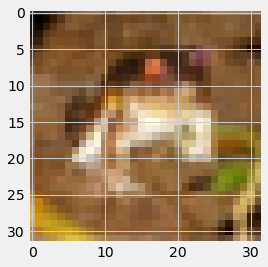

In [23]:
# showing a image
img = plt.imshow(x_train[index])

In [30]:
# getting label of above image
print("image label is :",y_train[index])
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#print image class
print("image class is :",classification[y_train[index][0]])
.

image label is : [6]
image class is : frog


In [32]:
# one hot encoding
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
# normalize data
x_train=x_train/255
x_test=x_test/255
print(x_test[index])
print(x_train[index])

[[[0.61960784 0.43921569 0.19215686]
  [0.62352941 0.43529412 0.18431373]
  [0.64705882 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254902 0.14117647]
  [0.49411765 0.35686275 0.14117647]
  [0.45490196 0.33333333 0.12941176]]

 [[0.59607843 0.43921569 0.2       ]
  [0.59215686 0.43137255 0.15686275]
  [0.62352941 0.44705882 0.17647059]
  ...
  [0.53333333 0.37254902 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509804 0.13333333]]

 [[0.59215686 0.43137255 0.18431373]
  [0.59215686 0.42745098 0.12941176]
  [0.61960784 0.43529412 0.14117647]
  ...
  [0.54509804 0.38431373 0.13333333]
  [0.50980392 0.37254902 0.13333333]
  [0.47058824 0.34901961 0.12941176]]

 ...

 [[0.26666667 0.48627451 0.69411765]
  [0.16470588 0.39215686 0.58039216]
  [0.12156863 0.34509804 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254902]
  [0.05098039 0.25098039 0.42352941]
  [0.15686275 0.33333333 0.49803922]]

 [[0.23921569 0.45490196 0.65882353]
  [0.19215686 0.4        0.58039216]


In [41]:
# creating model architecture
model=Sequential()

# add 1st layer
model.add( Conv2D(32,  (5,5),activation='relu',input_shape=(32,32,3)) )

# add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))


# add another layer
model.add( Conv2D(32,  (5,5),activation='relu') )

# add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# add flattening layer
model.add(Flatten())

# add a layer of 1000 neurons
model.add(Dense(1000,activation='relu'))

# add a dropout layer
model.add(Dropout(0.5))

# add a layer of 500 neurons
model.add(Dense(500,activation='relu'))

# add a dropout layer
model.add(Dropout(0.5))

# add a layer of 250 neurons
model.add(Dense(250,activation='relu'))

# add a layer of 10 neurons
model.add(Dense(10,activation='softmax'))




In [45]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [46]:
# train the model
hist=model.fit(x_train,y_train_one_hot,
               batch_size=256,
               epochs=10,
               validation_split=0.2
               )

Epoch 1/10
157/157 [==============================] - 81s 401ms/step - loss: 2.0487 - accuracy: 0.2208 - val_loss: 1.4958 - val_accuracy: 0.4537
Epoch 2/10
157/157 [==============================] - 61s 388ms/step - loss: 1.4779 - accuracy: 0.4524 - val_loss: 1.3233 - val_accuracy: 0.5257
Epoch 3/10
157/157 [==============================] - 61s 390ms/step - loss: 1.3003 - accuracy: 0.5265 - val_loss: 1.2173 - val_accuracy: 0.5684
Epoch 4/10
157/157 [==============================] - 62s 395ms/step - loss: 1.1916 - accuracy: 0.5686 - val_loss: 1.1018 - val_accuracy: 0.6107
Epoch 5/10
157/157 [==============================] - 61s 390ms/step - loss: 1.0924 - accuracy: 0.6083 - val_loss: 1.1618 - val_accuracy: 0.5914
Epoch 6/10
157/157 [==============================] - 61s 387ms/step - loss: 1.0387 - accuracy: 0.6299 - val_loss: 0.9977 - val_accuracy: 0.6451
Epoch 7/10
157/157 [==============================] - 61s 390ms/step - loss: 0.9618 - accuracy: 0.6561 - val_loss: 0.9949 - val_ac

In [47]:
# evaluate model using test data set
model.evaluate(x_test,y_test_one_hot)[1]


313/313 [==============================] - 6s 18ms/step - loss: 0.9873 - accuracy: 0.6596


0.659600019454956

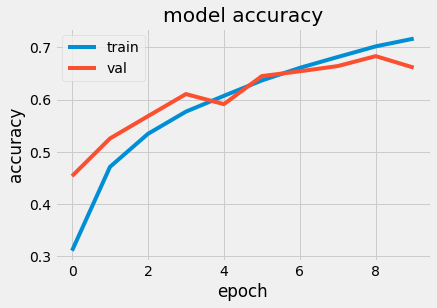

In [48]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'],loc='upper left' )


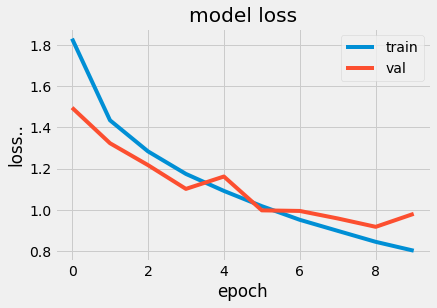

In [50]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss..')
plt.legend(['train','val'],loc='upper right' )

In [59]:
# test model
# from google.colab import files
# uploaded = files.upload()

!wget "https://cdn.pixabay.com/photo/2017/11/09/21/41/cat-2934720_1280.jpg"


--2021-07-30 01:45:04--  https://cdn.pixabay.com/photo/2017/11/09/21/41/cat-2934720_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172610 (169K) [image/jpeg]
Saving to: ‘cat-2934720_1280.jpg.1’

cat-2934720_1280.jp 100%[===================>] 168.56K  --.-KB/s    in 0.02s   

2021-07-30 01:45:04 (7.96 MB/s) - ‘cat-2934720_1280.jpg.1’ saved [172610/172610]



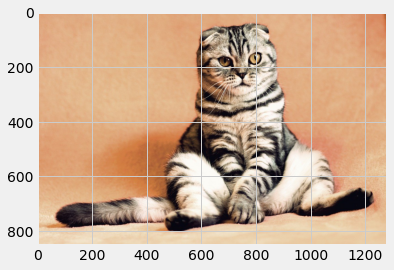

In [61]:
new_image=plt.imread('cat-2934720_1280.jpg.1')
img=plt.imshow(new_image)

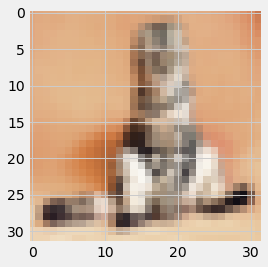

In [62]:
# resizing images
from skimage.transform import resize
resized_image=resize(new_image,(32,32,3))
img=plt.imshow(resized_image)

In [63]:
# model prediction
prediction = model.predict(np.array([resized_image]))
prediction

array([[0.04482   , 0.01946542, 0.07577781, 0.38802657, 0.08153412,
        0.13479841, 0.02393061, 0.017331  , 0.18873136, 0.02558482]],
      dtype=float32)

In [68]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]] :
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp
print(list_index)

[3, 8, 5, 4, 2, 0, 9, 6, 1, 7]


In [69]:
print(classification[list_index[0]])

cat
